# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    return (x**2)*numpy.sin(x)
    '''Function equivalent to x^2 sin(x).'''
    

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    return 2*x*numpy.sin(x)-(x**2-2)*numpy.cos(x)-2

    '''Analytical integral of f(x).'''
    # YOUR CODE HERE

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    return 2*xmax*numpy.sin(xmax)-(xmax**2-2)*numpy.cos(xmax)-(2*xmin*numpy.sin(xmin)-(xmin**2-2)*numpy.cos(xmin))
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [15]:
def integrate_numeric(xmin, xmax, N):
    a= (xmax-xmin)/N
    b=0 #calculating sum of mis first
    for i in range (0, N):
        b=b+(4*f((xmin+a/2+a*i)))
    c=0
    for i in range (1, N):
        c=c+(2*f(xmin+a*i))
    d= f(xmin)+f(xmax)
    return a*(d+b+c)/6

    
    
    
    #''' 
   # Numerical integral of f from xmin to xmax using Simpson's rule with 
        #N panels.
    #'''
    # YOUR CODE HERE

Make sure you have implemented Simpson's rule correctly:

In [16]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [17]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


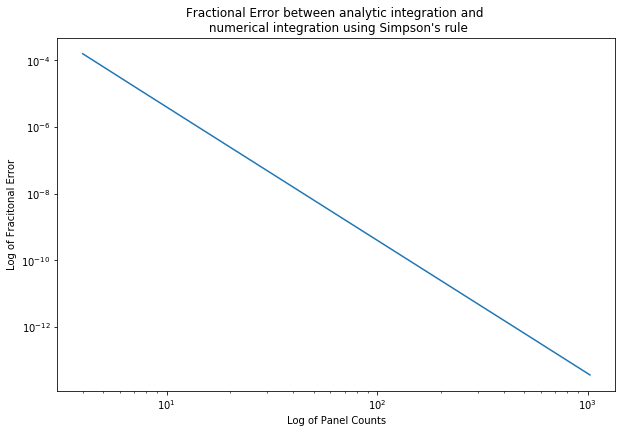

In [18]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
y_vals=[] # Array of the y values being set
for i in range (0,len(panel_counts)):
    y_vals.append(numpy.abs((result_analytic-integrate_numeric(x0,x1,panel_counts[i]))/result_analytic))
plt.figure(figsize=(10, 6.5))
plt.yscale('log')
plt.xscale('log')
plt.title("Fractional Error between analytic integration and \n numerical integration using Simpson's rule")
plt.xlabel("Log of Panel Counts")
plt.ylabel("Log of Fracitonal Error")
plt.plot(panel_counts,y_vals)

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels is increased the numerical method becomes more accurate. This can be seen in the figure whereby the fractional error decreases as the number of panels is increased. When more panels are used each quadratic will only have to approximate a smaller part of the function and therefore will better approximate the curve and its area.

If the number of panels is taken too large then problems with numerical precision will arise. This occurs when the computer can only store numbers used in calculations to a finite precision in which the last decimal place is calculated deterministically, but not accurately. Calculations involving these numbers will therefore contain inaccuracies as slightly incorrect values are used. It does not matter that these are very small inaccuracies because they are of the same magnitude for the values involved in operations such as division.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The accuracy of the method will also increase as the panel count increases for similar reasons. The accuracy does not improve as quickly as the Simpson method however; if the trapezium method was plotted on the same axis it would also have a negative gradient but it would be smaller showing for a certain increase in panel count the fractional error does not decrease as much. Higher order approximations improve quicker for higher panel counts (disregarding issues with numerical precision).